### Import essential libraries


In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import glob as gb
import cv2
import tqdm as tqdm
from PIL import Image
import tensorflow as tf
import keras
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

D0731 14:26:02.853553792      15 config.cc:119]                        gRPC EXPERIMENT tcp_frame_size_tuning               OFF (default:OFF)
D0731 14:26:02.853578062      15 config.cc:119]                        gRPC EXPERIMENT tcp_rcv_lowat                       OFF (default:OFF)
D0731 14:26:02.853582386      15 config.cc:119]                        gRPC EXPERIMENT peer_state_based_framing            OFF (default:OFF)
D0731 14:26:02.853585795      15 config.cc:119]                        gRPC EXPERIMENT flow_control_fixes                  ON  (default:ON)
D0731 14:26:02.853588930      15 config.cc:119]                        gRPC EXPERIMENT memory_pressure_controller          OFF (default:OFF)
D0731 14:26:02.853592313      15 config.cc:119]                        gRPC EXPERIMENT unconstrained_max_quota_buffer_size OFF (default:OFF)
D0731 14:26:02.853595488      15 config.cc:119]                        gRPC EXPERIMENT new_hpack_huffman_decoder           ON  (default:ON)
D0731 14:26:02.

### Preparing Data

In [3]:
# Storing the path of image folders in root and label in categories
root = '/kaggle/input/minerals-identification-classification/Minet 5640 Images'
categories = ['biotite','bornite','chrysocolla','malachite','muscovite','pyrite','quartz']

In [4]:
# Store pictures from all classes into pictures list
pictures = []
for category in categories:
    folder = os.path.join(root,category)
    file = os.listdir(folder)
    pictures.append(file)
len(pictures[0])

1070

In [5]:
# Creating dictionary of all kind of images and there counts
count = []
for i in range(7):
    count.append(len(pictures[i]))
    i = i + 1
data = {'Minerals':categories, 'Count': count}
df_mineral = pd.DataFrame(data)
df_mineral

,Minerals,Count
0,biotite,1070
1,bornite,419
2,chrysocolla,540
3,malachite,998
4,muscovite,344
5,pyrite,1086
6,quartz,1185


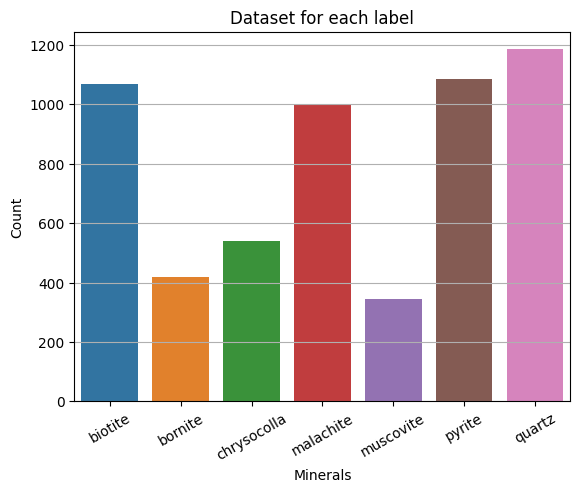

In [6]:
# Plotting bar plot for the number of images in each category
sns.barplot(data=df_mineral, x = 'Minerals', y = 'Count')
plt.title('Dataset for each label');
plt.xticks(rotation=30)
plt.grid(axis='y')

In [7]:
# Creating the variables
biotite = os.path.join(root,categories[0])
bornite = os.path.join(root,categories[1])
chrysocolla = os.path.join(root,categories[2])
malachite = os.path.join(root,categories[3])
muscovite = os.path.join(root,categories[4])
pyrite = os.path.join(root,categories[5])
quartz = os.path.join(root,categories[6])

In [8]:
print(len(os.listdir(biotite)))

1070


In [9]:
# Creating a function to get all the images into list x and labels into y
x = []
y = [] 
dataset =[]
def create_dataset(directory,dir_name):
    for i in tqdm.tqdm(os.listdir(directory)):
        full_path = os.path.join(directory,i)
        try:
            img = cv2.imread(full_path)
            img = cv2.resize(img,(256,256))
        except:
            continue
        x.append(img)
        y.append(dir_name)
    return x,y

In [10]:
# Getting all the images into list x and labels into y
x,y = create_dataset(biotite,'biotite')
x,y = create_dataset(bornite,'bornite')
x,y = create_dataset(chrysocolla,'chrysocolla')
x,y = create_dataset(malachite,'malachite')
x,y = create_dataset(muscovite,'muscovite')
x,y = create_dataset(pyrite,'pyrite')
x,y = create_dataset(quartz,'quartz')

100%|██████████| 1185/1185 [00:35<00:00, 33.00it/s]


In [11]:
# Converting x and y into numpy array
x = np.array(x)
y = np.array(y)
x.shape,y.shape

((5640, 256, 256, 3), (5640,))

In [12]:
# Checking x
x

array([[[[ 54,  98,  97],
         [ 68, 115, 112],
         [ 84, 134, 128],
         ...,
         [143, 139, 204],
         [142, 138, 203],
         [145, 141, 206]],

        [[ 85, 120, 143],
         [ 91, 128, 149],
         [100, 141, 158],
         ...,
         [124, 120, 183],
         [127, 122, 186],
         [134, 129, 193]],

        [[117, 141, 195],
         [115, 140, 191],
         [118, 146, 193],
         ...,
         [126, 121, 183],
         [128, 123, 184],
         [130, 125, 186]],

        ...,

        [[ 42,  68, 168],
         [ 44,  70, 168],
         [ 46,  70, 166],
         ...,
         [ 50,  73, 175],
         [ 45,  68, 170],
         [ 45,  68, 170]],

        [[ 49,  76, 174],
         [ 49,  74, 172],
         [ 48,  73, 167],
         ...,
         [ 59,  81, 182],
         [ 57,  79, 180],
         [ 60,  81, 182]],

        [[ 57,  85, 182],
         [ 57,  82, 177],
         [ 54,  78, 170],
         ...,
         [ 55,  77, 177],
        

In [13]:
# checking y
y

array(['biotite', 'biotite', 'biotite', ..., 'quartz', 'quartz', 'quartz'],
      dtype='<U11')

In [14]:
# Lets visualize the resized image
def visualize(X,y):
    plt.figure(figsize = (15,12))
    for i in range(64):
        random = np.random.randint(0,len(X))
        image = X[random]
        label = y[random]
        plt.subplot(8,8,i+1)
        plt.subplots_adjust(hspace=0.3)
        plt.imshow(image)
        plt.title(label)
        plt.axis(False)
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

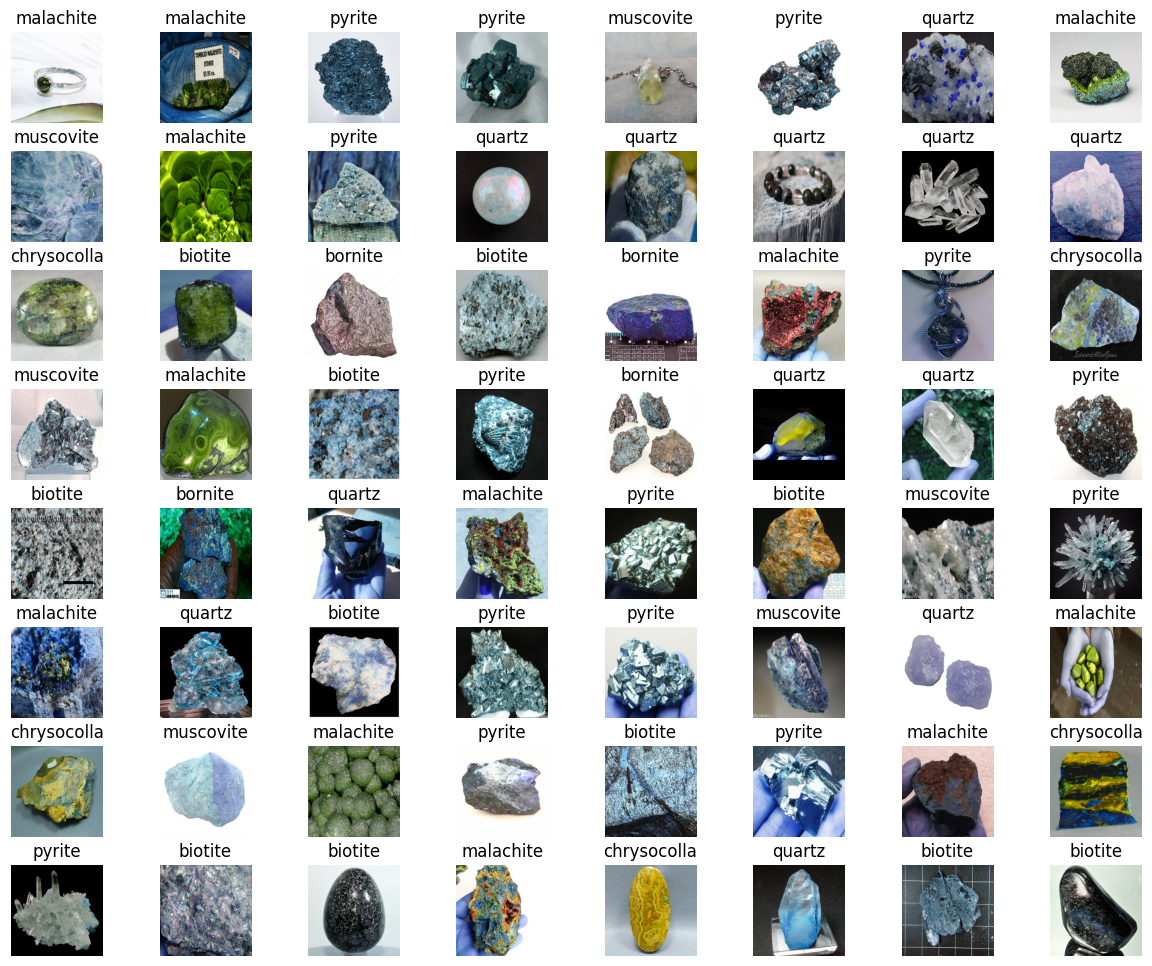

In [15]:
# Calling the visualize function
visualize(x,y)

In [16]:
# Encode the labels into numerical values using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
y,np.unique(y),y.shape

(array([0, 0, 0, ..., 6, 6, 6]), array([0, 1, 2, 3, 4, 5, 6]), (5640,))

In [17]:
# Split the data into train and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size = 0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3948, 256, 256, 3), (1692, 256, 256, 3), (3948,), (1692,))

In [18]:
# change the shape of the labels so that neural network be compatible
from tensorflow.keras.utils import to_categorical
total_classes = len(np.unique(y_train))
y_train = to_categorical(y_train,total_classes)
y_test = to_categorical(y_test,total_classes)
y_train.shape,y_test.shape

((3948, 7), (1692, 7))

In [19]:
# Checking y_train and y_test
y_train,y_test

(array([[1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 1.],
        [0., 0., 0., ..., 0., 0., 1.],
        [1., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32))

#### First building basic Dense Neural Network and training this model over training images

In [20]:
# Set the random seed for reproducibility
tf.random.set_seed(42) 
# Create the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(256,256,3)), # Flattening from 2d to 1d
    tf.keras.layers.Dense(units = 20,activation = 'relu'),
    tf.keras.layers.Dense(units = 10,activation = 'relu'),
    tf.keras.layers.Dense(7,activation = 'softmax')
])

In [21]:
# Compile the model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [22]:
# Fit the model
history = model.fit(X_train,y_train,epochs = 10,validation_data = (X_test,y_test))

Epoch 1/10
124/124 [==============================] - 3s 21ms/step - loss: 1605.7433 - accuracy: 0.1922 - val_loss: 1.9284 - val_accuracy: 0.1962
Epoch 2/10
124/124 [==============================] - 2s 15ms/step - loss: 1.9167 - accuracy: 0.2161 - val_loss: 1.9090 - val_accuracy: 0.1962
Epoch 3/10
124/124 [==============================] - 2s 15ms/step - loss: 1.8986 - accuracy: 0.2161 - val_loss: 1.8943 - val_accuracy: 0.1962
Epoch 4/10
124/124 [==============================] - 2s 15ms/step - loss: 1.8852 - accuracy: 0.2090 - val_loss: 1.8841 - val_accuracy: 0.1962
Epoch 5/10
124/124 [==============================] - 2s 16ms/step - loss: 1.8755 - accuracy: 0.2161 - val_loss: 1.8768 - val_accuracy: 0.1962
Epoch 6/10
124/124 [==============================] - 2s 16ms/step - loss: 1.8686 - accuracy: 0.2161 - val_loss: 1.8718 - val_accuracy: 0.1962
Epoch 7/10
124/124 [==============================] - 2s 15ms/step - loss: 1.8637 - accuracy: 0.2161 - val_loss: 1.8680 - val_accuracy: 0.1

In [23]:
# Evaluate the model on test set
model.evaluate(X_test,y_test)

53/53 [==============================] - 0s 4ms/step - loss: 1.8627 - accuracy: 0.1962


[1.8627023696899414, 0.19621749222278595]

(0.0, 4.0)

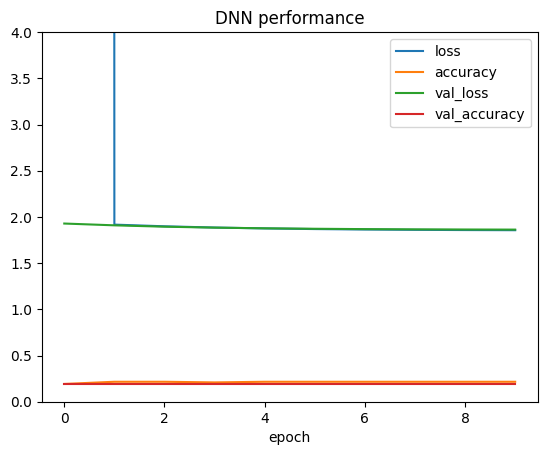

In [24]:
# Visualize the history of the model1
pd.DataFrame(history.history).plot(title = "DNN performance",xlabel = 'epoch')
plt.ylim([0,4])

#### After training for 10 number of epochs its observed that the accuracy of model is not improving over training images.

#### Lets try different Neural Network Architecture: CNN

In [26]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
# Try a simple CNN
model = tf.keras.Sequential([
    #First Convolutional layers
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    # Dense layer
    Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(7,activation='softmax')    
    
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 flatten_1 (Flatten)         (None, 516128)            0         
                                                                 
 dense_3 (Dense)             (None, 128)               66064512  
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 7)                 455       
                                                      

In [27]:
# Compile the model
model.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [28]:
# Fit the model
history = model.fit(X_train,y_train,epochs = 10,validation_data=(X_test,y_test))

Epoch 1/10
124/124 [==============================] - 63s 496ms/step - loss: 786.0013 - accuracy: 0.4184 - val_loss: 7.6564 - val_accuracy: 0.5993
Epoch 2/10
124/124 [==============================] - 61s 496ms/step - loss: 2.3798 - accuracy: 0.8017 - val_loss: 3.7860 - val_accuracy: 0.7766
Epoch 3/10
124/124 [==============================] - 62s 499ms/step - loss: 1.2198 - accuracy: 0.8898 - val_loss: 2.5821 - val_accuracy: 0.8115
Epoch 4/10
124/124 [==============================] - 62s 503ms/step - loss: 0.6715 - accuracy: 0.9402 - val_loss: 2.6872 - val_accuracy: 0.8227
Epoch 5/10
124/124 [==============================] - 63s 506ms/step - loss: 0.8332 - accuracy: 0.9481 - val_loss: 2.4050 - val_accuracy: 0.8251
Epoch 6/10
124/124 [==============================] - 63s 505ms/step - loss: 0.7377 - accuracy: 0.9625 - val_loss: 2.9488 - val_accuracy: 0.8239
Epoch 7/10
124/124 [==============================] - 62s 502ms/step - loss: 0.6990 - accuracy: 0.9709 - val_loss: 3.6307 - val_

In [29]:
model.evaluate(X_test,y_test)

53/53 [==============================] - 4s 75ms/step - loss: 2.0527 - accuracy: 0.8369


[2.0526797771453857, 0.8368794322013855]

(0.0, 4.0)

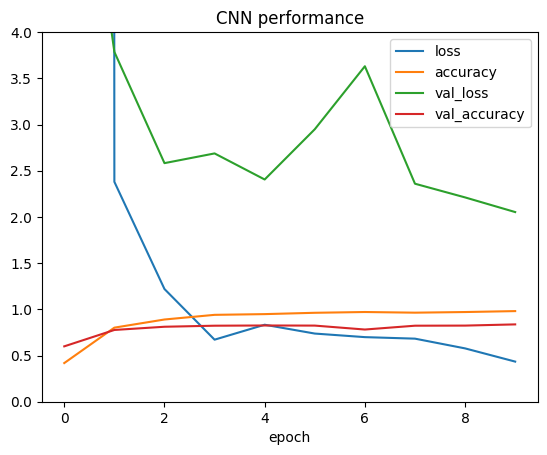

In [32]:
# Visualize the history of the model
pd.DataFrame(history.history).plot(title = "CNN performance",xlabel = 'epoch')
plt.ylim([0,4])

#### we can see that the CNN model is working well than DNN but still it is not learning well. the validation accuracy is almost constant after certain number of epochs. and also the validation accuracy is much less than training accuracy so it is the case of overfitting.

#### Let's train for higher number of epochs keeping all the configuration same to check if any improvement occur in the validation accuracy 

In [28]:
model_1 = tf.keras.Sequential([
    #First Convolutional layers
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    # Dense layer
    Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(7,activation='softmax')    
    
])
model_1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               66064512  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                      

In [29]:
model_1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [30]:
history_1 = model_1.fit(X_train,y_train,epochs = 50,validation_data=(X_test,y_test))

Epoch 1/50
124/124 [==============================] - 5s 33ms/step - loss: 378.8901 - accuracy: 0.5165 - val_loss: 5.6020 - val_accuracy: 0.7216
Epoch 2/50
124/124 [==============================] - 3s 28ms/step - loss: 2.5449 - accuracy: 0.8455 - val_loss: 3.4675 - val_accuracy: 0.7985
Epoch 3/50
124/124 [==============================] - 3s 26ms/step - loss: 1.2829 - accuracy: 0.9248 - val_loss: 3.4943 - val_accuracy: 0.8103
Epoch 4/50
124/124 [==============================] - 3s 27ms/step - loss: 1.0792 - accuracy: 0.9582 - val_loss: 2.7688 - val_accuracy: 0.8014
Epoch 5/50
124/124 [==============================] - 3s 27ms/step - loss: 0.9765 - accuracy: 0.9524 - val_loss: 2.1549 - val_accuracy: 0.8103
Epoch 6/50
124/124 [==============================] - 3s 28ms/step - loss: 0.9876 - accuracy: 0.9775 - val_loss: 3.0518 - val_accuracy: 0.8227
Epoch 7/50
124/124 [==============================] - 3s 26ms/step - loss: 1.2522 - accuracy: 0.9764 - val_loss: 2.3536 - val_accuracy: 0.81

In [31]:
model_1.evaluate(X_test,y_test)

53/53 [==============================] - 1s 9ms/step - loss: 1.2711 - accuracy: 0.8203


[1.2711485624313354, 0.8203309774398804]

(0.0, 2.0)

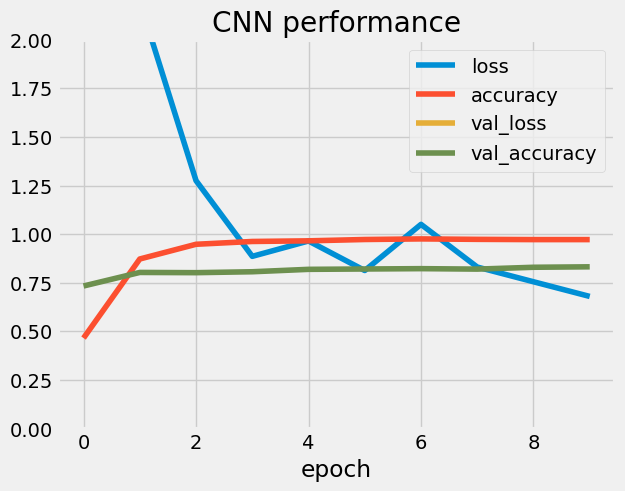

In [34]:
# Visualize the history of the model_3
pd.DataFrame(history.history).plot(title = "CNN performance",xlabel = 'epoch')
plt.ylim([0,2])

#### Though increasing number of iterations increased validation accuracy little bit but still see that after certain epochs the validation accuracy is almost constant and also validation accuracy is much less than the training accuracy. Again its overfitting.

#### Let's try normalizing the pixel values to address the issue of overfitting.

In [20]:
# Scaling the pixel values of all images between 0 and 1.
X_train_norm = X_train/255
X_test_norm = X_test/255
X_train_norm.max(),X_test_norm.max(),X_train_norm.min(),X_test_norm.min()

(1.0, 1.0, 0.0, 0.0)

In [34]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model_2 = tf.keras.Sequential([
    #First Convolutional layers
    tf.keras.layers.Conv2D(32,(3,3),activation='relu',input_shape=(256,256,3)),
    tf.keras.layers.MaxPooling2D(pool_size=2,strides=2),
    # Dense layer
    Flatten(),
    tf.keras.layers.Dense(128,activation = 'relu'),
    tf.keras.layers.Dense(64,activation = 'relu'),
    tf.keras.layers.Dense(7,activation='softmax')    
    
])
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 127, 127, 32)     0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 516128)            0         
                                                                 
 dense_6 (Dense)             (None, 128)               66064512  
                                                                 
 dense_7 (Dense)             (None, 64)                8256      
                                                                 
 dense_8 (Dense)             (None, 7)                 455       
                                                      

In [35]:
model_2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [36]:
history_2 = model_2.fit(X_train_norm,y_train,epochs = 10,validation_data=(X_test_norm,y_test))

Epoch 1/10
124/124 [==============================] - 63s 498ms/step - loss: 2.2453 - accuracy: 0.5149 - val_loss: 0.7911 - val_accuracy: 0.7606
Epoch 2/10
124/124 [==============================] - 60s 485ms/step - loss: 0.4201 - accuracy: 0.8797 - val_loss: 0.5186 - val_accuracy: 0.8446
Epoch 3/10
124/124 [==============================] - 61s 491ms/step - loss: 0.1863 - accuracy: 0.9514 - val_loss: 0.5873 - val_accuracy: 0.8558
Epoch 4/10
124/124 [==============================] - 60s 483ms/step - loss: 0.1010 - accuracy: 0.9782 - val_loss: 0.5010 - val_accuracy: 0.8587
Epoch 5/10
124/124 [==============================] - 60s 486ms/step - loss: 0.0890 - accuracy: 0.9797 - val_loss: 0.5621 - val_accuracy: 0.8629
Epoch 6/10
124/124 [==============================] - 60s 484ms/step - loss: 0.0628 - accuracy: 0.9838 - val_loss: 0.5482 - val_accuracy: 0.8682
Epoch 7/10
124/124 [==============================] - 60s 487ms/step - loss: 0.0679 - accuracy: 0.9833 - val_loss: 0.5204 - val_ac

In [37]:
model_2.evaluate(X_test_norm,y_test)

53/53 [==============================] - 4s 67ms/step - loss: 0.5813 - accuracy: 0.8652


[0.5813090205192566, 0.8652482032775879]

(0.0, 2.0)

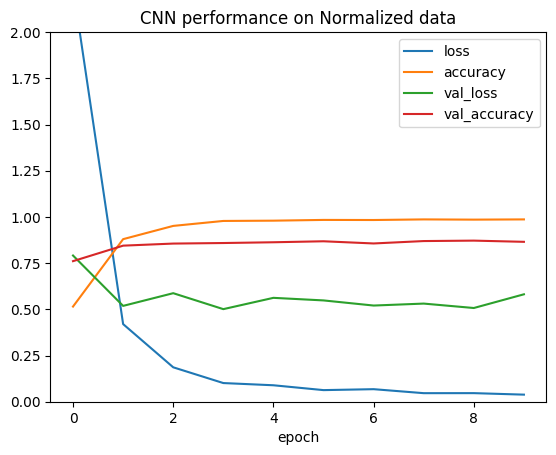

In [39]:
# Visualize the history of the model_2
pd.DataFrame(history_2.history).plot(title = "CNN performance on Normalized data",xlabel = 'epoch')
plt.ylim([0,2])

In [22]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model_3 = tf.keras.Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(112, activation='relu'),
    Dense(224, activation='relu'),
    Dense(units = 7, activation='softmax')
])
model_3.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [23]:
model_3.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = ['accuracy']
)

In [24]:
# fit the model
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3*10**(epoch/20))
history_3 = model_3.fit(X_train_norm,y_train,epochs = 10,validation_data = (X_test_norm,y_test),
                       callbacks = [lr_scheduler])

Epoch 1/10
124/124 [==============================] - 82s 649ms/step - loss: 1.5771 - accuracy: 0.3906 - val_loss: 1.2615 - val_accuracy: 0.5290 - lr: 0.0010
Epoch 2/10
124/124 [==============================] - 79s 634ms/step - loss: 0.9401 - accuracy: 0.6771 - val_loss: 0.6623 - val_accuracy: 0.7796 - lr: 0.0011
Epoch 3/10
124/124 [==============================] - 78s 626ms/step - loss: 0.4607 - accuracy: 0.8531 - val_loss: 0.6991 - val_accuracy: 0.8020 - lr: 0.0013
Epoch 4/10
124/124 [==============================] - 78s 632ms/step - loss: 0.2672 - accuracy: 0.9212 - val_loss: 0.6999 - val_accuracy: 0.8304 - lr: 0.0014
Epoch 5/10
124/124 [==============================] - 78s 631ms/step - loss: 0.1769 - accuracy: 0.9481 - val_loss: 0.7285 - val_accuracy: 0.8327 - lr: 0.0016
Epoch 6/10
124/124 [==============================] - 78s 630ms/step - loss: 0.1348 - accuracy: 0.9635 - val_loss: 0.8129 - val_accuracy: 0.8067 - lr: 0.0018
Epoch 7/10
124/124 [==============================] 

In [25]:
# Evaluate the model
model_3.evaluate(X_test_norm,y_test)

53/53 [==============================] - 5s 93ms/step - loss: 0.8083 - accuracy: 0.8209


[0.8082661628723145, 0.8209219574928284]

Text(0, 0.5, 'Loss')

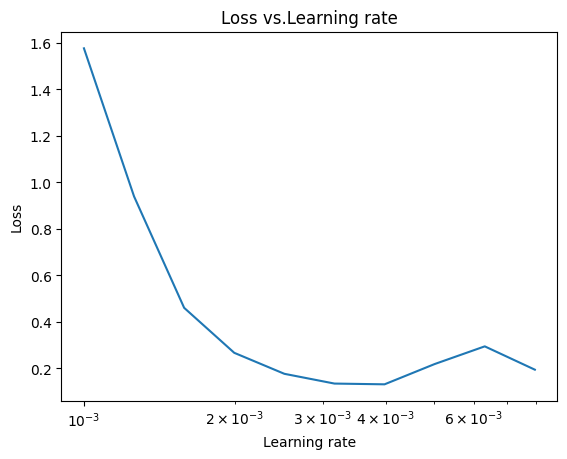

In [26]:
# Lets plot the loss vs.learning rate
lrs = 1e-3*10**(tf.range(10)/10)
# print(pd.DataFrame(data=[history_3.history['loss'],lrs],columns=['loss','learning_rate']))
plt.semilogx(lrs,history_6.history['loss'])
plt.title("Loss vs.Learning rate")
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [27]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model_4 = tf.keras.Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(112, activation='relu'),
    Dense(224, activation='relu'),
    Dense(units = 7, activation='softmax')
])
model_4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 128, 128, 32)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 32, 32, 32)      

In [28]:
model_4.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0015),
    metrics = ['accuracy']
)

In [31]:
history_4 = model_4.fit(X_train_norm,y_train,epochs = 50,validation_data = (X_test_norm,y_test))

Epoch 1/50
124/124 [==============================] - 84s 665ms/step - loss: 1.5289 - accuracy: 0.3906 - val_loss: 1.2723 - val_accuracy: 0.5496
Epoch 2/50
124/124 [==============================] - 80s 646ms/step - loss: 0.9296 - accuracy: 0.6879 - val_loss: 0.8281 - val_accuracy: 0.7388
Epoch 3/50
124/124 [==============================] - 79s 640ms/step - loss: 0.4570 - accuracy: 0.8516 - val_loss: 0.6384 - val_accuracy: 0.8126
Epoch 4/50
124/124 [==============================] - 79s 639ms/step - loss: 0.2677 - accuracy: 0.9119 - val_loss: 0.9007 - val_accuracy: 0.7831
Epoch 5/50
124/124 [==============================] - 80s 646ms/step - loss: 0.2105 - accuracy: 0.9384 - val_loss: 0.8234 - val_accuracy: 0.8292
Epoch 6/50
124/124 [==============================] - 79s 639ms/step - loss: 0.1179 - accuracy: 0.9688 - val_loss: 0.9031 - val_accuracy: 0.8398
Epoch 7/50
124/124 [==============================] - 80s 648ms/step - loss: 0.1052 - accuracy: 0.9701 - val_loss: 0.9536 - val_ac

In [32]:
# Evaluate the model
model_4.evaluate(X_test_norm,y_test)

53/53 [==============================] - 5s 91ms/step - loss: 1.0028 - accuracy: 0.8463


[1.0028331279754639, 0.8463357090950012]

(0.0, 2.0)

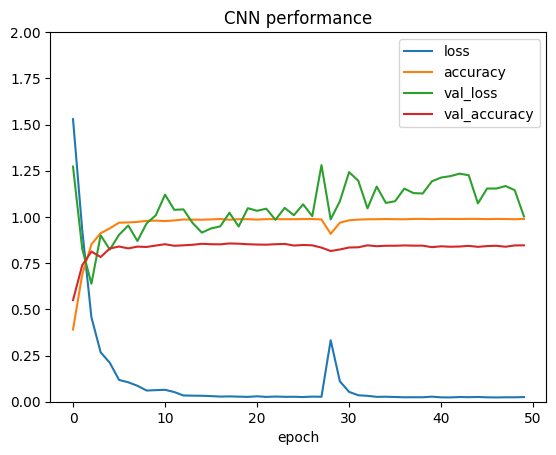

In [33]:
pd.DataFrame(history_4.history).plot(title = "CNN performance",xlabel = 'epoch')
plt.ylim([0,2])

#### Let's try Data Augmentation to get the rid of overfitting

In [21]:
from keras.preprocessing.image import ImageDataGenerator

In [22]:
datagen = ImageDataGenerator(
    rotation_range = 45,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest'
)
datagen.fit(X_train_norm)

In [23]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense
model_5 = tf.keras.Sequential([
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(32, 3, padding='same', activation='relu', input_shape=(256,256,3)),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(112, activation='relu'),
    Dense(224, activation='relu'),
    Dense(units = 7, activation='softmax')
])
model_5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [24]:
model_5.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.0015),
    metrics = ['accuracy']
)

In [25]:
History_5 = model_5.fit_generator(datagen.flow(X_train_norm,y_train),
                              epochs = 50, validation_data = (X_test_norm,y_test),
                              )

Epoch 1/50
124/124 [==============================] - 90s 714ms/step - loss: 1.6025 - accuracy: 0.3485 - val_loss: 1.6863 - val_accuracy: 0.3156
Epoch 2/50
124/124 [==============================] - 88s 704ms/step - loss: 1.4454 - accuracy: 0.4258 - val_loss: 1.4727 - val_accuracy: 0.4267
Epoch 3/50
124/124 [==============================] - 87s 698ms/step - loss: 1.4175 - accuracy: 0.4529 - val_loss: 1.3139 - val_accuracy: 0.5213
Epoch 4/50
124/124 [==============================] - 88s 708ms/step - loss: 1.3419 - accuracy: 0.5129 - val_loss: 1.4289 - val_accuracy: 0.4905
Epoch 5/50
124/124 [==============================] - 88s 706ms/step - loss: 1.3005 - accuracy: 0.5233 - val_loss: 1.2713 - val_accuracy: 0.5408
Epoch 6/50
124/124 [==============================] - 87s 698ms/step - loss: 1.2456 - accuracy: 0.5441 - val_loss: 1.3284 - val_accuracy: 0.5325
Epoch 7/50
124/124 [==============================] - 89s 717ms/step - loss: 1.2115 - accuracy: 0.5643 - val_loss: 1.2237 - val_ac

In [26]:
# Evaluate the model
model_5.evaluate(X_test_norm,y_test)

53/53 [==============================] - 5s 90ms/step - loss: 0.7908 - accuracy: 0.7902


[0.7907720804214478, 0.7901891469955444]

(0.0, 2.0)

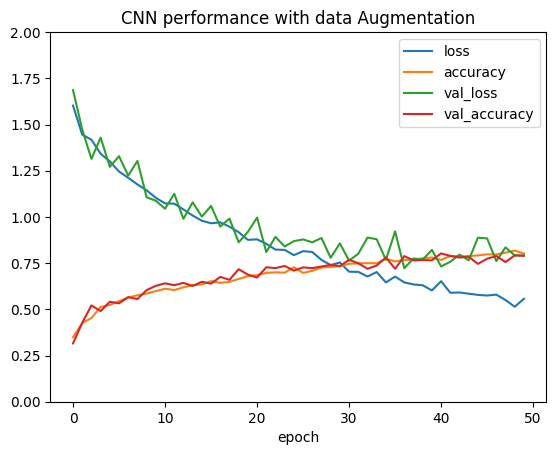

In [27]:
pd.DataFrame(History_5.history).plot(title = "CNN performance with data Augmentation",xlabel = 'epoch')
plt.ylim([0,2])

#### See the curve of validation accuracy and training accuracy is almost coinciding so data augmentation countered overfitting problem

#### Prediction using trained model on augmented data.

In [28]:
y_probs = model_5.predict(X_test_norm)
y_probs 

53/53 [==============================] - 5s 91ms/step


array([[1.0972554e-02, 7.7342980e-02, 3.6804855e-03, ..., 2.4112172e-03,
        3.5381806e-03, 1.3439458e-02],
       [4.3936170e-04, 1.7946048e-03, 9.1388690e-01, ..., 4.8404541e-02,
        8.5998653e-03, 2.4826758e-02],
       [2.9641817e-05, 9.2878260e-02, 2.2026414e-09, ..., 1.2278380e-02,
        5.1565129e-01, 3.7916243e-01],
       ...,
       [6.5130275e-04, 2.9140963e-07, 1.0208857e-01, ..., 1.5482210e-03,
        1.4580844e-07, 5.0517201e-07],
       [7.4634504e-13, 3.4220346e-08, 5.6002295e-07, ..., 3.2716903e-06,
        5.2429063e-13, 5.0959602e-07],
       [1.7098073e-02, 6.8554804e-02, 1.0491170e-05, ..., 3.0554366e-01,
        5.9823573e-01, 1.0554972e-02]], dtype=float32)

In [29]:
y_pred = tf.argmax(y_probs,axis = 1)
y_test = tf.argmax(y_test,axis = 1)
y_pred,y_test

(<tf.Tensor: shape=(1692,), dtype=int64, numpy=array([3, 2, 5, ..., 3, 3, 5])>,
 <tf.Tensor: shape=(1692,), dtype=int64, numpy=array([3, 2, 5, ..., 3, 3, 5])>)

In [30]:
# Lets check it with the actual label
rand_index = np.random.randint(0,100)
categories[y_pred[rand_index]],categories[int(y_test[rand_index])]

('quartz', 'quartz')

In [31]:
# Make confusion matrix
from sklearn.metrics import confusion_matrix
import itertools
# create a function for confusion matrix
def make_confusion_matrix(y_test,y_pred,classes = None,figsize = (10,10)):
    cm = confusion_matrix(y_test,y_pred)
    cm_norm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
  # Lets prettify it
    fig,ax = plt.subplots(figsize=figsize)
  # creat a matrix plot
    cax = ax.matshow(cm,cmap=plt.cm.Blues)
    fig.colorbar(cax)
  # Set xaxis labels to bottom
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
  # Adjust label size
    ax.yaxis.label.set_size(10)
    ax.xaxis.label.set_size(10)
    ax.title.set_size(10)

    if classes:
        labels = classes
    else:
        labels = np.arange(cm.shape[0])
  # Label the axes
    ax.set(title = 'Confusion Matrix',
        xlabel = 'Predicted label',
        ylabel = 'True value',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels  = labels)
  # Set threshold for different colors
    threshold = (cm.max()+cm.min())/2
  # plot the text on each cell
    for i,j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i, f"{cm[i,j]} ({cm_norm[i,j]*100:.1f}%)",
            horizontalalignment = 'center',
            color = 'white' if cm[i,j]>threshold else 'black',
            size = 10)

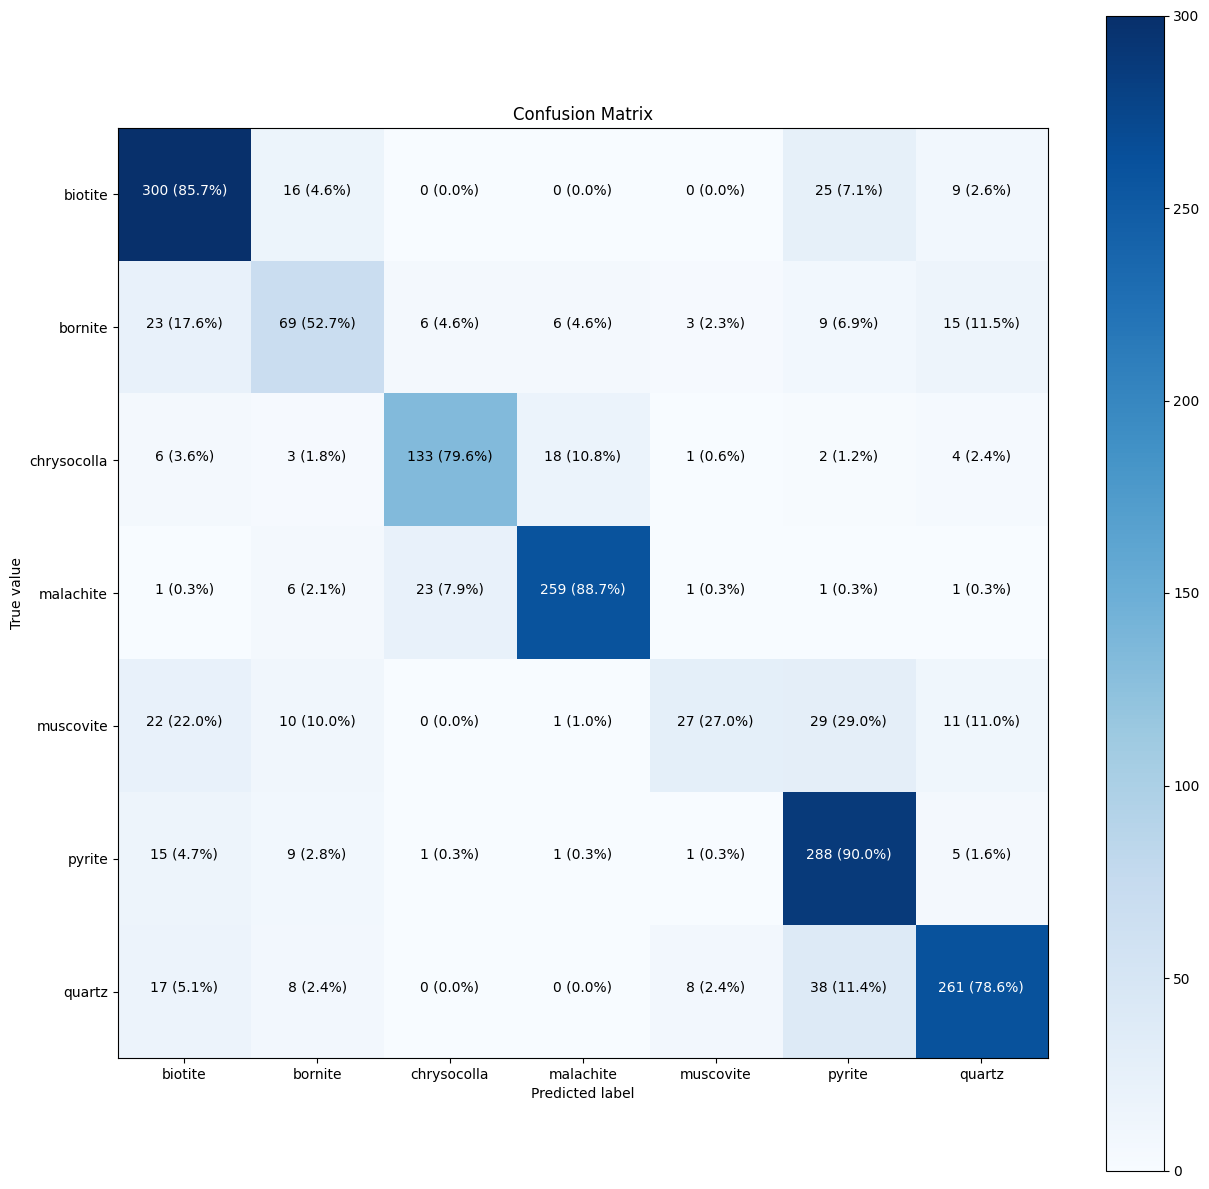

In [32]:
# Lets visualize confusion matrix
make_confusion_matrix(y_test,y_pred,categories,figsize = (15,15))

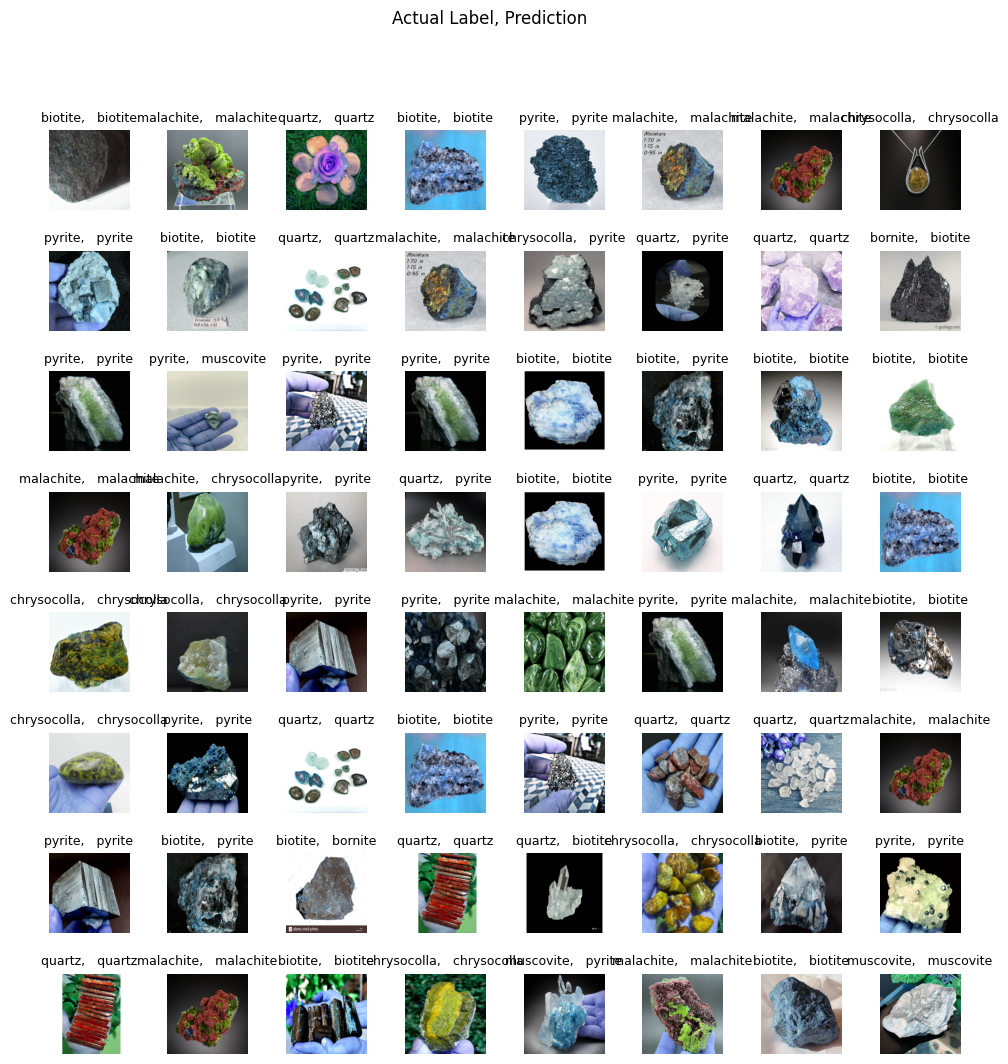

In [35]:
# Lets see random 64 images of our test lables and predictions  (Left lable: true label and right label: predicted label)
# reshape the test set into 256 x 256 pixel
X_test = X_test.reshape(X_test.shape[0],256,256,3)
plt.figure(figsize = (12,12))
fontsize = 9
for i in range(64):
    rand_index = np.random.randint(0,100)
    ax = plt.subplot(8,8,i+1)
    plt.imshow(X_test[rand_index],cmap = plt.cm.binary)
    plt.subplots_adjust(hspace=0.5)
    ax.set_title(f"{categories[y_test[rand_index]]}, {categories[y_pred[rand_index]]}",fontdict={'fontsize':fontsize})
    plt.suptitle("Actual Label, Prediction")
    plt.axis(False)